In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel(r'DataFinal17-20.xlsx',sheet_name='2017')
df1=df.iloc[:,2:16]
df1=df1.drop(['Total'], axis=1)
df1.head()

,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,Offences against property,Offences relating to documents and property marks,Miscellaneous,Others,Population
0,215,715,886,410,303,0,85,588,2849,177,2453,235,4543159
1,101,143,1161,144,96,0,31,108,854,72,2106,210,1813906
2,168,273,1553,345,215,2,79,174,2278,268,3765,245,2888445
3,220,515,1613,474,264,0,69,374,3319,440,2667,326,3701282
4,164,292,925,196,134,1,32,340,1077,90,1739,172,2585049


In [3]:
from sklearn.cluster import KMeans

#create a list for the wcss parameter
wcss = []
#test with 14 clusters
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [4]:
wcss

[251990508867440.34,
 55691867740399.195,
 19924197494476.75,
 11064525454318.979,
 7470460633903.647,
 4418674891724.765,
 2715942689181.5537,
 1760186251355.5554,
 955488231009.6667,
 716225925666.8667,
 528039911595.11664,
 406286952090.44995,
 300936950643.7,
 194268801634.05713]

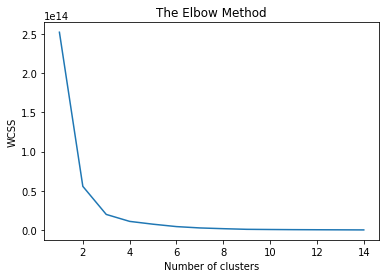

In [5]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
km=KMeans(n_clusters=6)
y_pred=km.fit_predict(df1)

In [23]:
y_pred

array([2, 0, 4, 2, 4, 0, 4, 4, 0, 0, 0, 0, 2, 0, 2, 4, 3, 2, 4, 0, 5, 0,
       0, 0, 1, 4, 0, 4, 4, 0, 2, 3, 0, 0, 4])

In [24]:
df['cluster']=y_pred
df.head()

,SrNo,District,Homicide/Murder,Causing death by negligence,Hurt,Assault on woman,Kidnapping and abduction,Human trafficking,Rape,Offence against public tranquility,...,Others,Total,Population,Crime Rate,Sex Ratio,Literacy,Density,Latitude,Longitude,cluster
0,1,Ahmednagar,215,715,886,410,303,0,85,588,...,235,8916,4543159,0.196251,939,0.7905,266,19.094829,74.747979,2
1,2,Akola,101,143,1161,144,96,0,31,108,...,210,5026,1813906,0.277082,946,0.8805,320,20.700216,77.008168,0
2,3,Amravati,168,273,1553,345,215,2,79,174,...,245,9365,2888445,0.324223,951,0.8738,237,20.931982,77.752304,4
3,4,Aurangbad,220,515,1613,474,264,0,69,374,...,326,10281,3701282,0.277769,923,0.7902,366,19.876165,75.343314,2
4,5,Beed,164,292,925,196,134,1,32,340,...,172,5162,2585049,0.199687,916,0.7699,242,18.990088,75.753132,4


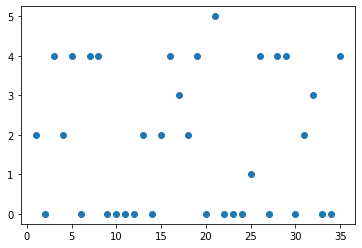

In [25]:
plt.scatter(df['SrNo'],df['cluster'])